In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Extract data from local files

Uso pandas para la lectura de datos puesto que son archivos separados por comas y al utilizar el dataset como dataframe me permite realizar algunas operaciones de preprocesamiento con facilidad. Al no tener titulos (cabeceras) los he insertado de forma manual. En la documentación se indica que los valores desconocidos son representados con el simbolo '?', se reemplzaron por valores "nan".

I use pandas for reading data since they are comma separated files and using the dataset as dataframe allows me to perform some preprocessing operations easily. As they do not have titles (headers) I have inserted them manually. In the documentation it is indicated that the unknown values are represented with the symbol '?', they were replaced by "nan" values.

In [121]:
names=["Age","WorkClass",
        "fnlwgt","education",
        "edu_num","marital_status",
        "occupation","relationship",
        "race","sex","capital_gain",
        "capital_loss","hpweek","native_country","Income"]

data=pd.read_csv("data/adult.data",
                delimiter=',',
                header=None,
                skipinitialspace = True,
                na_values=['?'])
data.columns=names
data.head()

,Age,WorkClass,fnlwgt,education,edu_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hpweek,native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [126]:
data_test=pd.read_csv("data/adult.test",
                        delimiter=',',
                        header=None,
                        skiprows=1,
                        skipinitialspace = True,
                        na_values=['?'])
data_test.columns=names
data_test.head()

,Age,WorkClass,fnlwgt,education,edu_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hpweek,native_country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


# Explore dataset
Necesito verificar algunos aspectos como lo son:
* Valores perdidos o no disponibles
* Proporcion de datos utilizados (clases y variables categoricas)

I need to verify some aspects such as:
* Missing or unavailable values
* Proportion of data used (classes and categorical variables)

In [130]:
data.isnull().sum()

Age                  0
WorkClass         1836
fnlwgt               0
education            0
edu_num              0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hpweek               0
native_country     583
Income               0
dtype: int64

Los valores no disponibles se pueden eliminar o bien rellenar, sin embargo ambas opciones podrian provocar obtener modelos sesgados

Unavailable values can be removed or filled in, but both options may result in biased models.

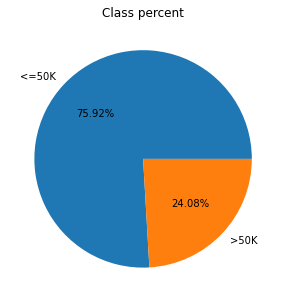

In [128]:
target_ratio=data["Income"].value_counts().to_dict()
plt.figure(figsize=(5,5))
plt.title("Class percent")
plt.pie(x=target_ratio.values(),labels=target_ratio.keys(),autopct='%1.2f%%')
plt.show()

The previous figure show that dataset is unbalanced

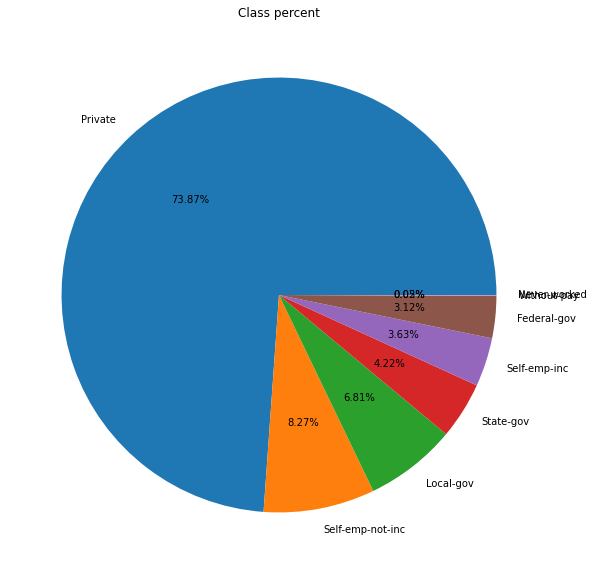

In [122]:
target_ratio=data["WorkClass"].value_counts().to_dict()
plt.figure(figsize=(10,10))
plt.title("Class percent")
plt.pie(x=target_ratio.values(),labels=target_ratio.keys(),autopct='%1.2f%%')
plt.show()

In [127]:
data["WorkClass"].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [20]:
data[5].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [21]:
data[13].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)